# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

**Betonun dayanıklılığını ölçmek için uygulanan test(Slump Test)

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement  *çimento
* Slag    *Cüruf(elektroliz işleminde ortaya çıkan ve kaplanan metalin yüzeyinde biriken artıklara da cüruf denir.)
* Fly ash *Uçucu Kül 
* Water   *Su
* SP      *Solit particul
* Coarse Aggr. *Kaba taneli
* Fine Aggr.  *ince taneli

(Measurements)(2)
* SLUMP (cm) -Çökme
* FLOW (cm)  -Akış

Target variable (1):
* **28-day Compressive Strength (Mpa)  ** 28 Günlük Basınç Dayanımı (Mpa)

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading data

In [2]:
df = pd.read_csv("cement_slump.csv")
df

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820
...,...,...,...,...,...,...,...,...,...,...
98,248.300,101.000,239.100,168.900,7.700,954.200,640.600,0.000,20.000,49.970
99,248.000,101.000,239.900,169.100,7.700,949.900,644.100,2.000,20.000,50.230
100,258.800,88.000,239.600,175.300,7.600,938.900,646.000,0.000,20.000,50.500
101,297.100,40.900,239.900,194.000,7.500,908.900,651.800,27.500,67.000,49.170


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


# EDA and Graphical analysis

In [4]:
df.describe()
# std, meanden büyük veya meane yakın bir değerse datamızın genelinde bir outler problemi olduğuna dair çıkarım sağlar

# "min" ile %25'lik ilk çeyrek arasında ve/veya %75'lik 3.çeyrek ile max arasında uçurum varsa datamızın genelinde 
# olmasa da sınırlı sayıda outlier değerler olabileceğine dair çıkarım sağlar

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000
mean,229.894,77.974,149.015,197.168,8.540,883.979,739.605,18.049,49.611,36.039
std,78.877,60.461,85.418,20.208,2.808,88.391,63.342,8.751,17.569,7.837
min,137.000,0.000,0.000,160.000,4.400,708.000,640.600,0.000,20.000,17.190
25%,152.000,0.050,115.500,180.000,6.000,819.500,684.500,14.500,38.500,30.900
50%,248.000,100.000,164.000,196.000,8.000,879.000,742.700,21.500,54.000,35.520
75%,303.900,125.000,235.950,209.500,10.000,952.800,788.000,24.000,63.750,41.205
max,374.000,193.000,260.000,240.000,19.000,1049.900,902.000,29.000,78.000,58.530


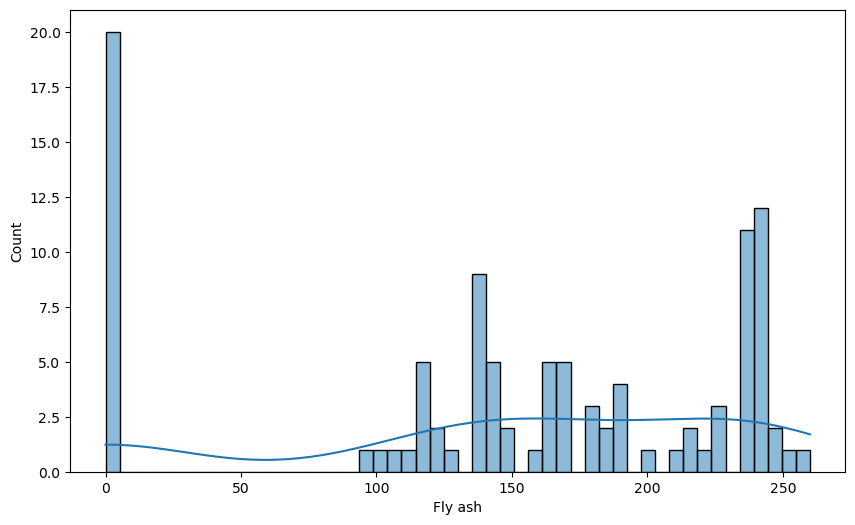

In [7]:
sns.histplot(df["Fly ash"], bins=50, kde=True);

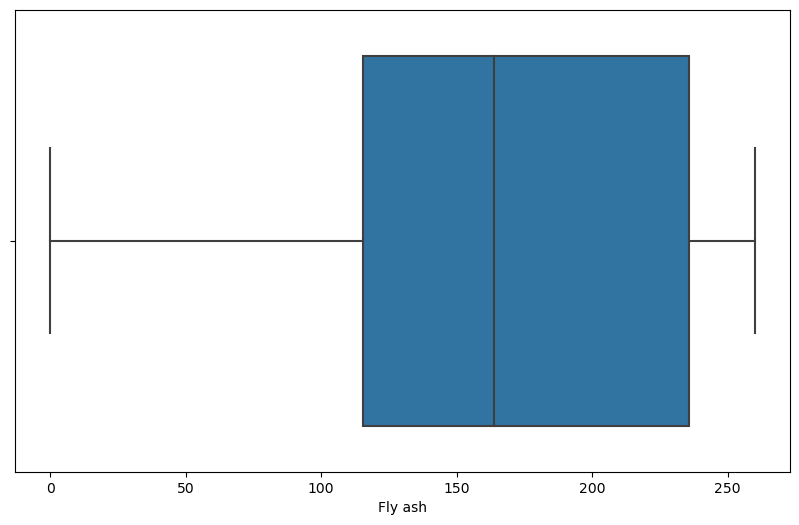

In [8]:
sns.boxplot(df["Fly ash"]);

#ML'deki outlier yaklaşımı
# elinizdeki outlier veriler eğitim için yeterli mi değil mi sorusuna cevap aramakla ifade edilir. Normal dağılımın çok
# dışında kalmış veya boxplot whisker'larının dışında kalan değerlerin sayısı üzerinden outlier olup olmadıkları yorumlanır
# Bu sayı az ise eğitim için yeterli veri yok denip outlier yaklaşımında bulunulabilir. 

In [5]:
df.corr()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000,-0.244,-0.487,0.221,-0.106,-0.310,0.057,0.146,0.186,0.446
Slag,-0.244,1.000,-0.323,-0.027,0.307,-0.224,-0.184,-0.284,-0.327,-0.332
Fly ash,-0.487,-0.323,1.000,-0.241,-0.144,0.173,-0.283,-0.119,-0.055,0.444
Water,0.221,-0.027,-0.241,1.000,-0.155,-0.602,0.115,0.467,0.632,-0.254
SP,-0.106,0.307,-0.144,-0.155,1.000,-0.104,0.058,-0.213,-0.176,-0.038
Coarse Aggr.,-0.310,-0.224,0.173,-0.602,-0.104,1.000,-0.489,-0.188,-0.326,-0.161
Fine Aggr.,0.057,-0.184,-0.283,0.115,0.058,-0.489,1.000,0.202,0.190,-0.155
SLUMP(cm),0.146,-0.284,-0.119,0.467,-0.213,-0.188,0.202,1.000,0.906,-0.223
FLOW(cm),0.186,-0.327,-0.055,0.632,-0.176,-0.326,0.190,0.906,1.000,-0.124
Compressive Strength (28-day)(Mpa),0.446,-0.332,0.444,-0.254,-0.038,-0.161,-0.155,-0.223,-0.124,1.000


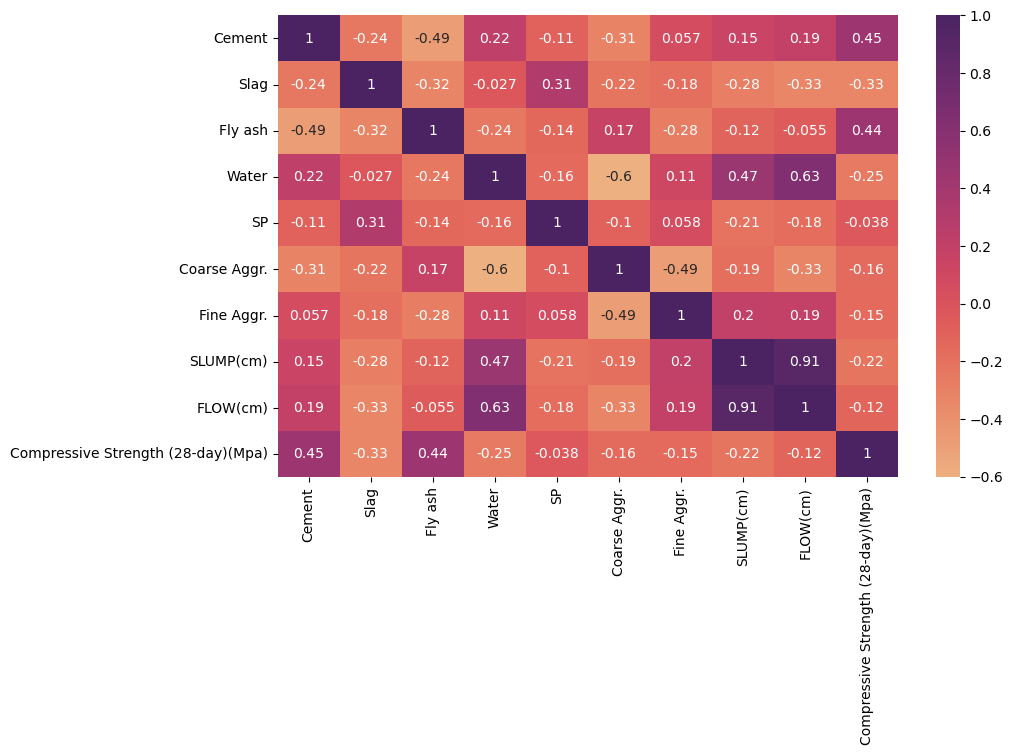

In [6]:
sns.heatmap(df.corr(), annot = True, cmap = "flare")
plt.show();

In [9]:

def check_dist(df, feat):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    sns.histplot(x=feat, data=df)
    plt.subplot(1, 2, 2)
    stats.probplot(df[feat], dist="norm", plot=plt)
    plt.show()
    

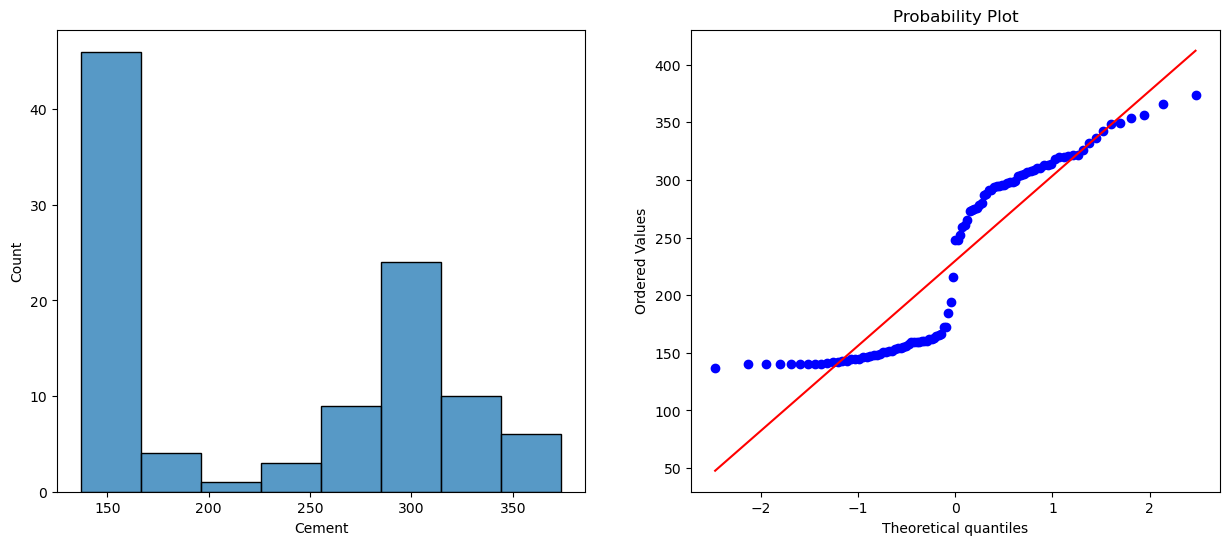

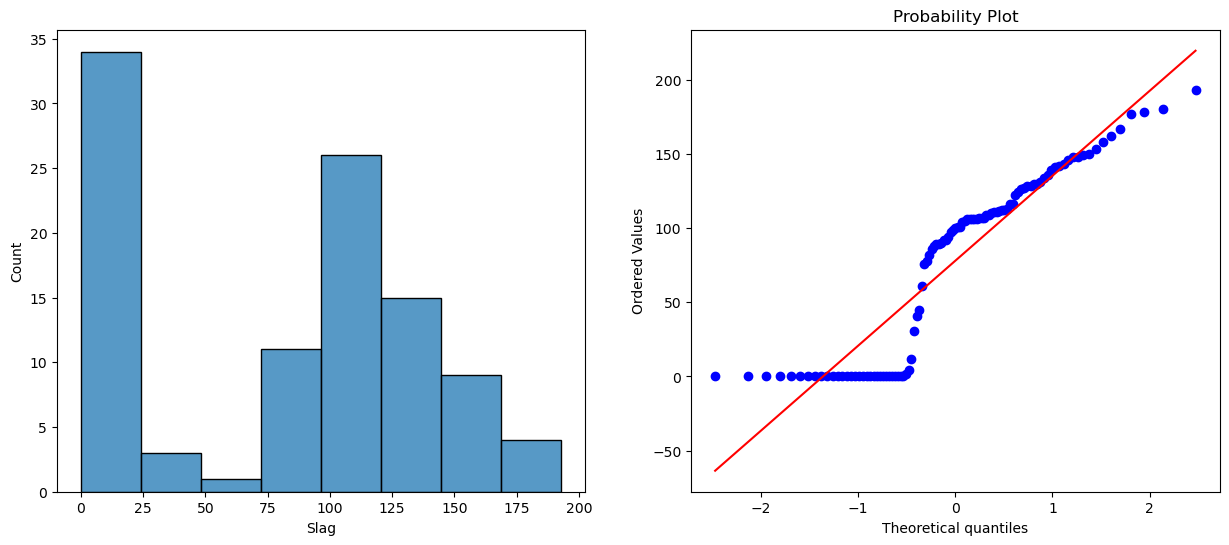

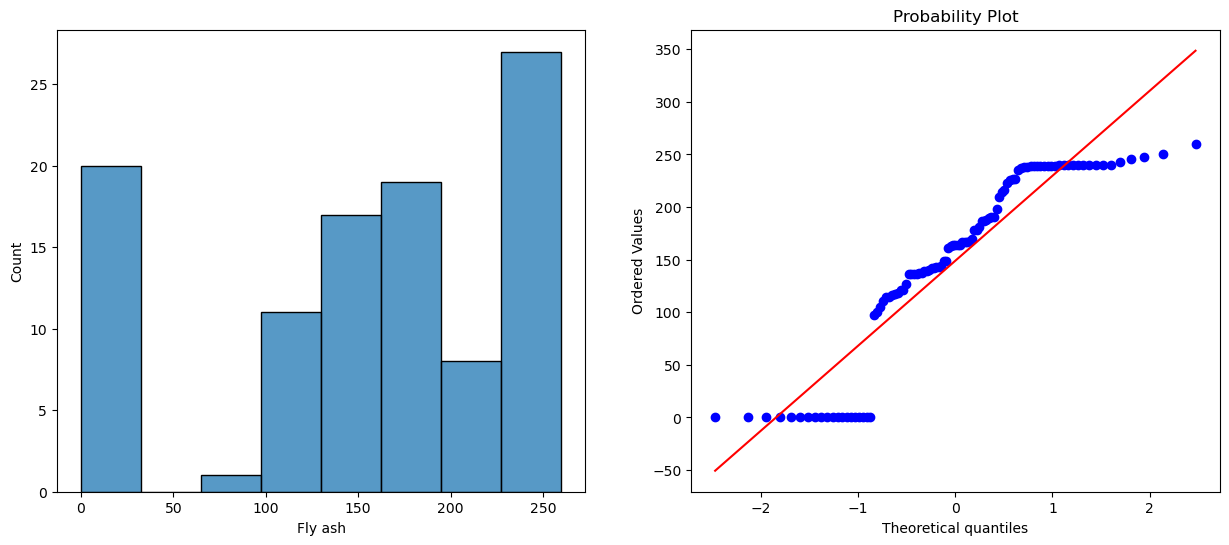

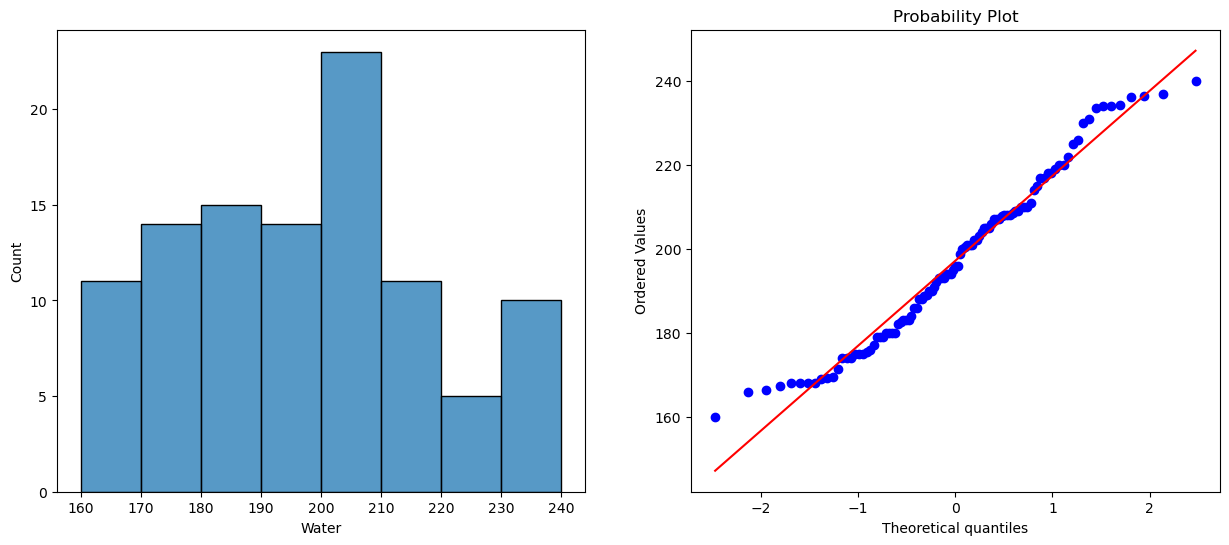

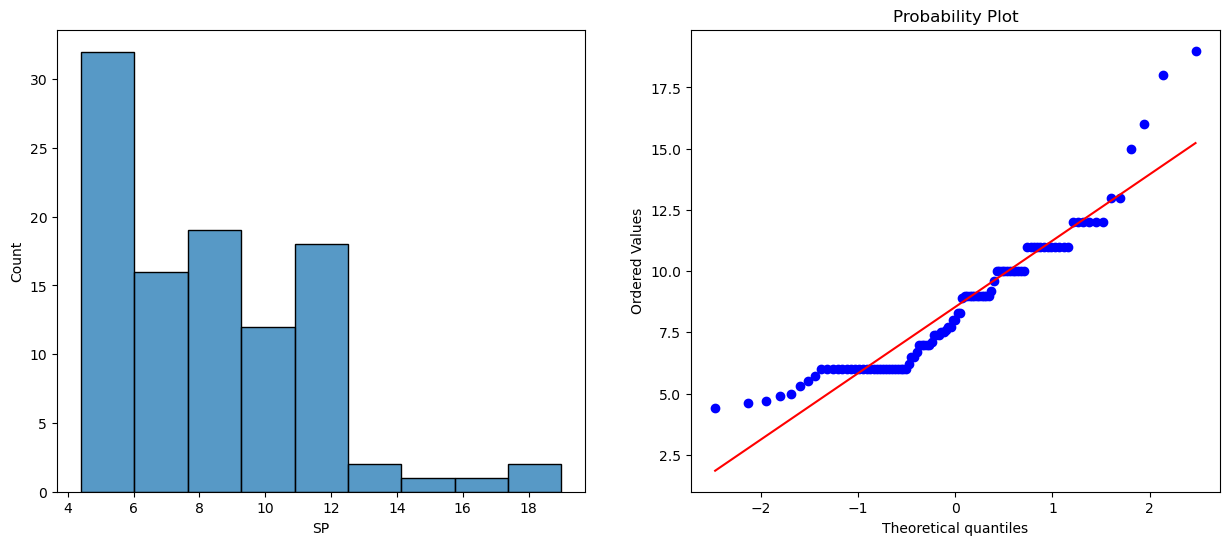

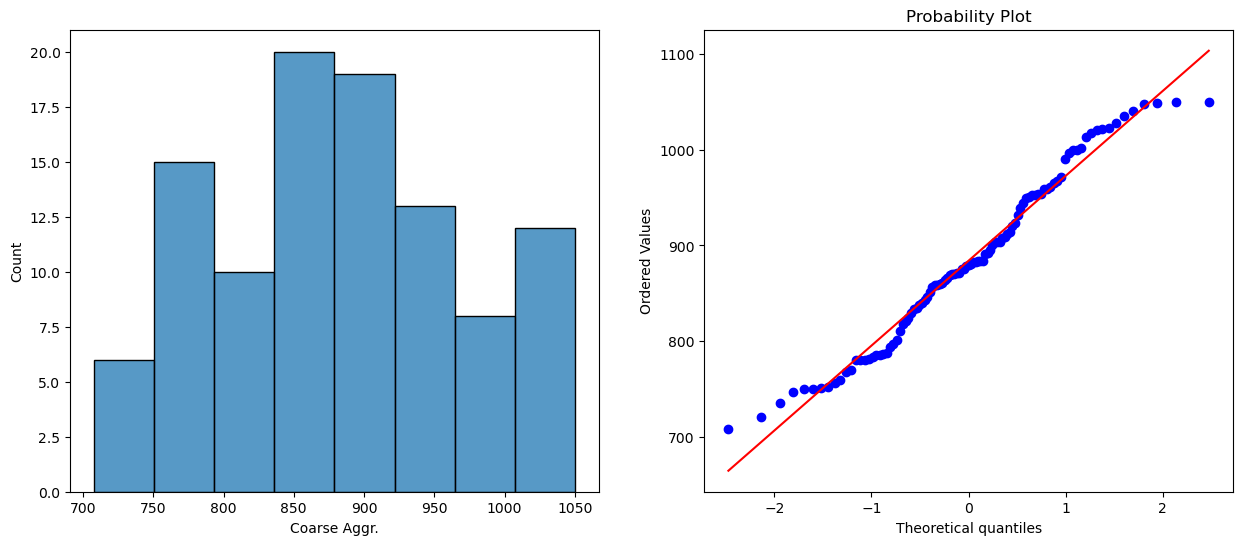

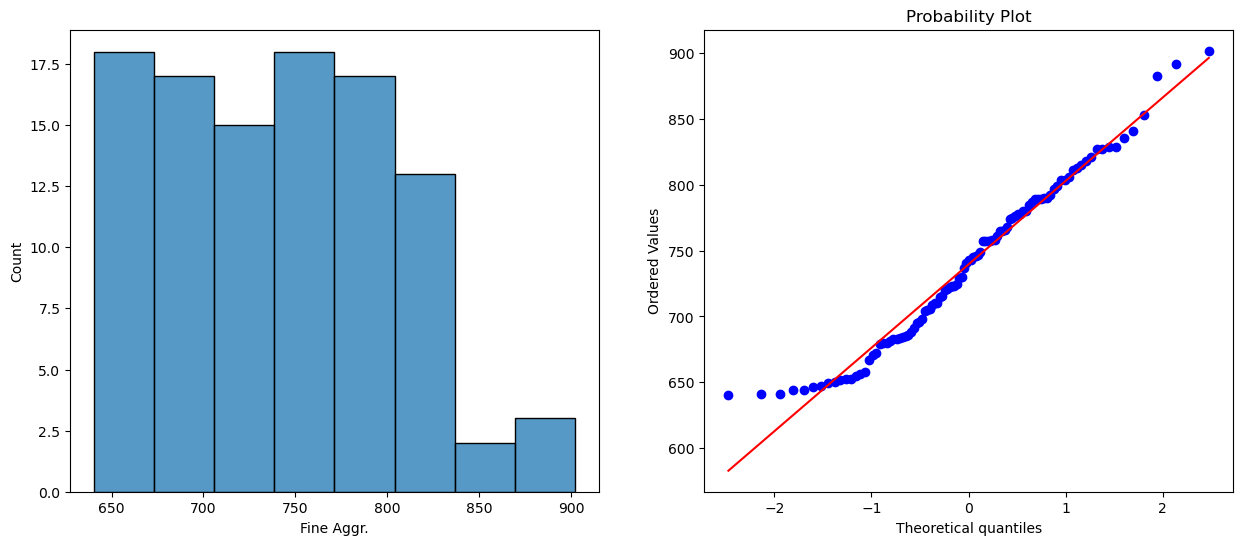

In [10]:

for col in df.drop(['SLUMP(cm)','FLOW(cm)','Compressive Strength (28-day)(Mpa)'], axis=1).columns:
    check_dist(df, col)
    

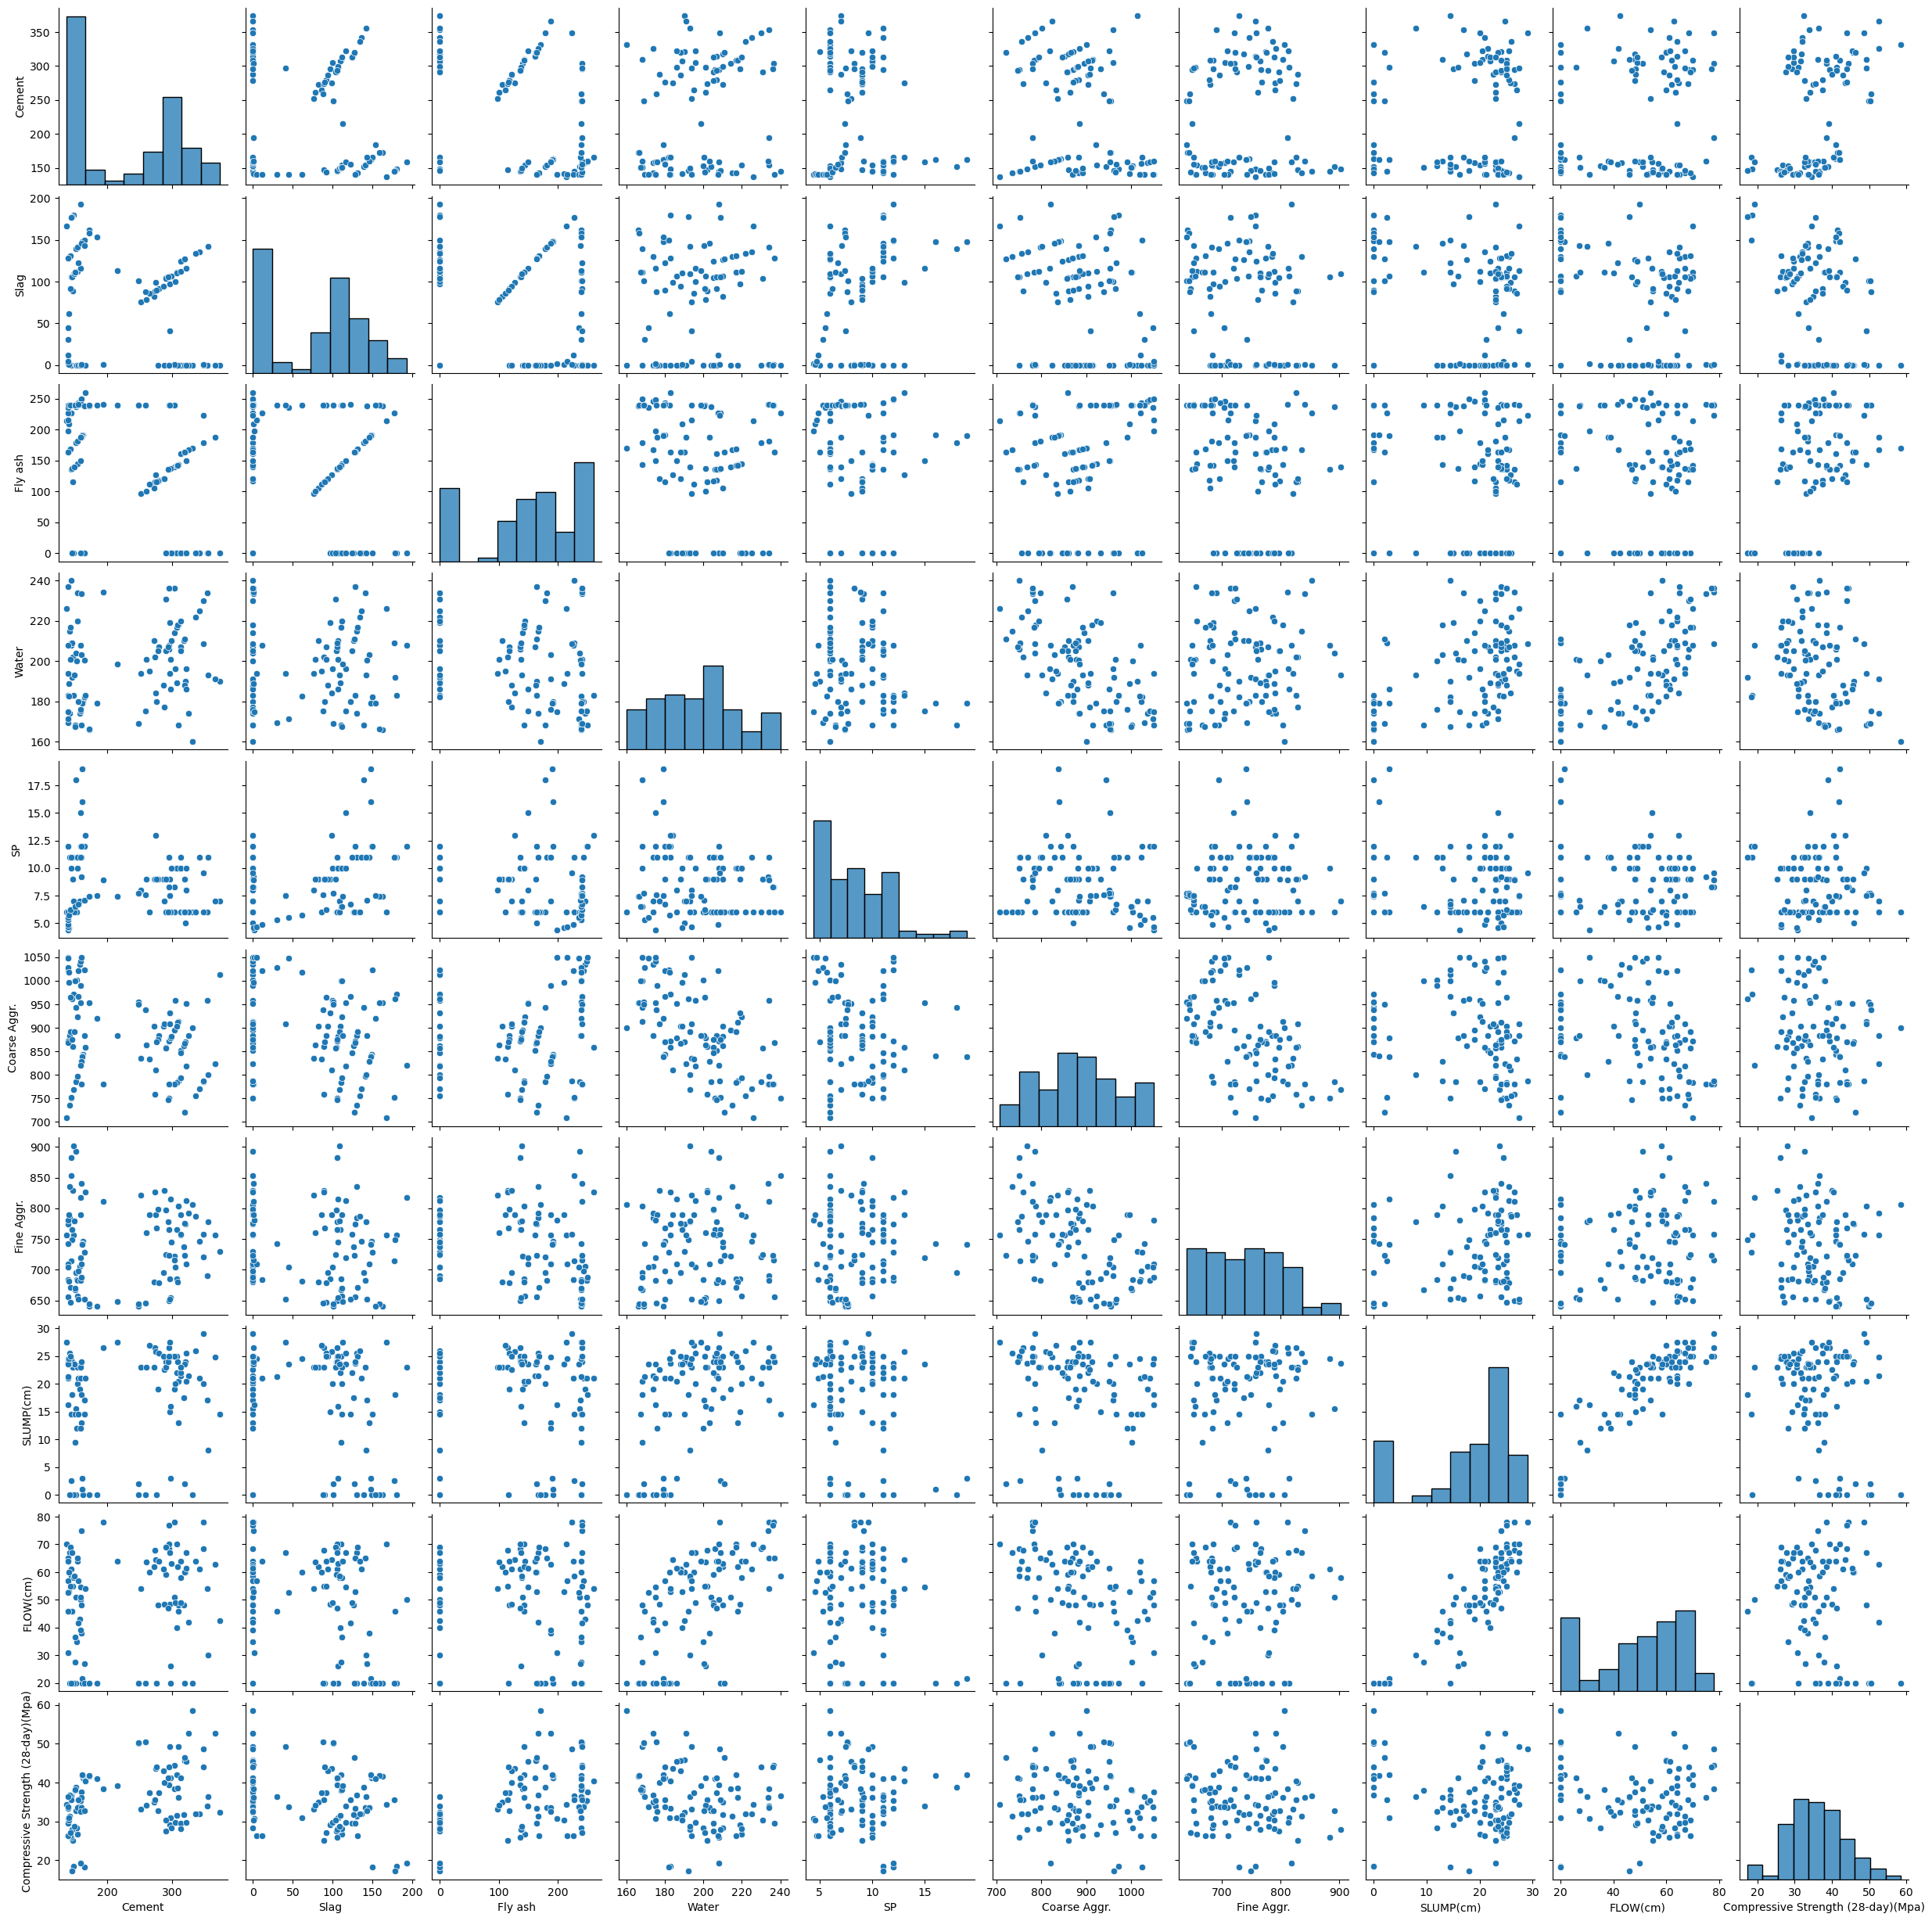

In [11]:
sns.pairplot(df);

In [127]:
# pip install scikit-learn

from scipy.stats import skew

In [128]:
for i in df.drop(['SLUMP(cm)','FLOW(cm)','Compressive Strength (28-day)(Mpa)'], axis=1).columns:
    print(f"{i:<20}:" , skew(df[i]))

Cement              : 0.143018080025135
Slag                : -0.19025570165636085
Fly ash             : -0.6700750110990055
Water               : 0.2596787728611975
SP                  : 1.109292164009971
Coarse Aggr.        : 0.11923919661490137
Fine Aggr.          : 0.26206928281772435


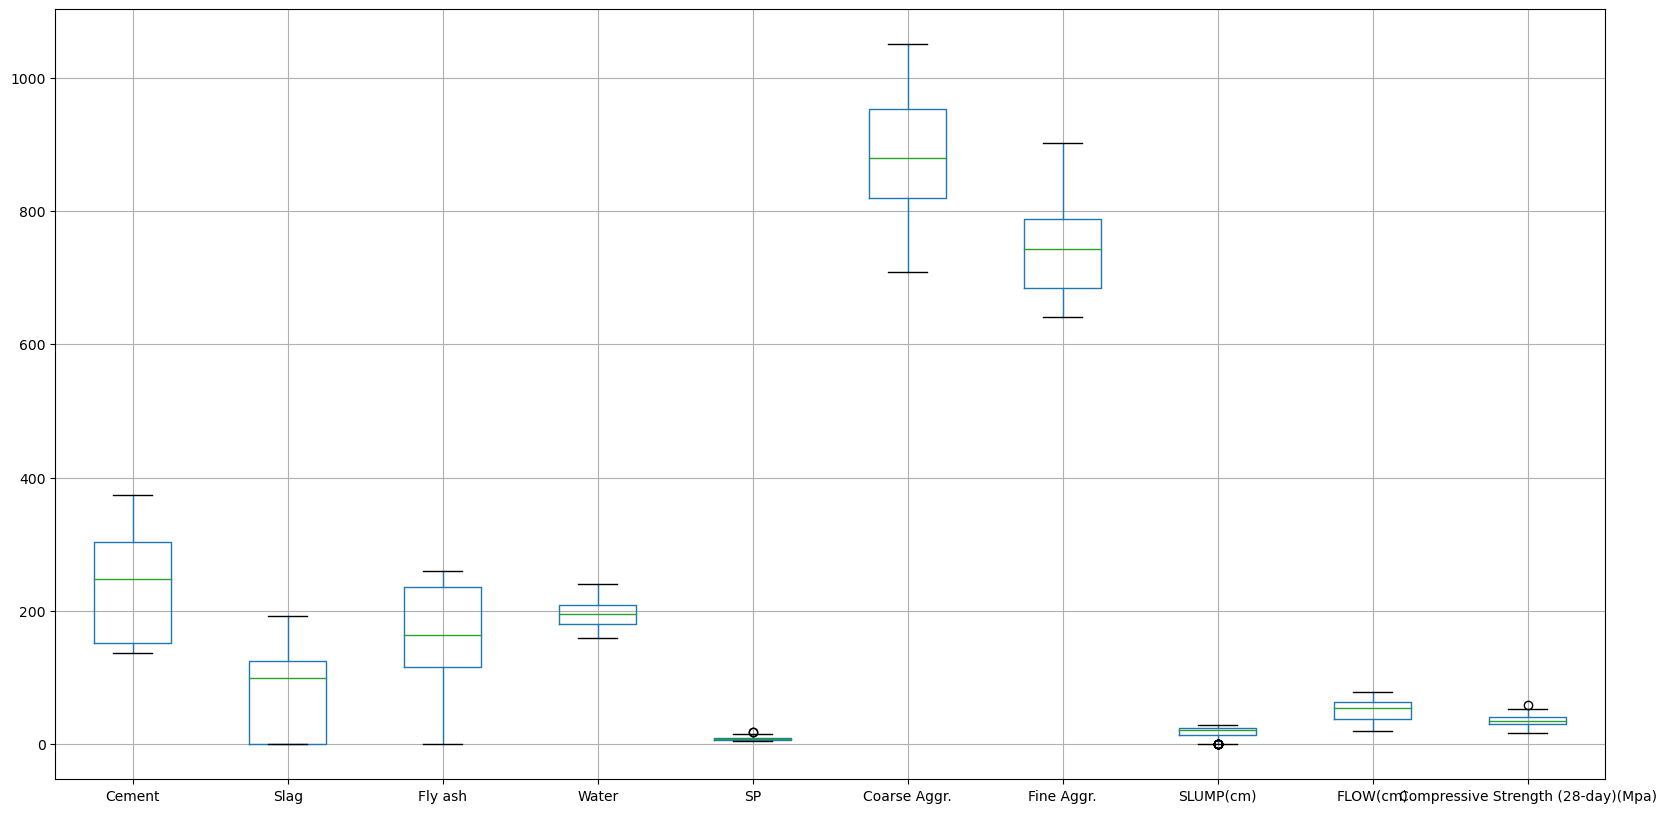

In [12]:
plt.figure(figsize =(20,10))
df.boxplot();

# Data Preprocessing 

### Features and target variable
* Split the data into features and target variable

In [13]:
#Target Variable is Compressive Strength (28-day)(Mpa)

X = df.drop( columns = "Compressive Strength (28-day)(Mpa)")

y= df["Compressive Strength (28-day)(Mpa)"]

### Splitting data into training and testing
* Split the data into training and testing sets

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [16]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (82, 9)
Train target shape   :  (82,)
Test features shape  :  (21, 9)
Test target shape    :  (21,)


## Scaling
* import StandardScaler and scale the data. Use fit_transform() on the training set and transform() on the testing set to prevent data leakage.

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()  #it will be used in pippline later 

# En fazla yukarıda import ettiğimiz 3 scale algoritması kullanılır. Robustscaler datamızda outlier değerler varsa tercih
# edilebilir.

# Hangi scale algortimasını kullanmalıyım?
# Best practice olarak standartscale ve minmax scale algoritmları sırasıyla denenir hangisi iyi sonuç veriyorsa onunla 
# devam edilir Outlier sorununuz varsa robustscale tercih edilebilir. Ancak outlier sorununuz olsa bile tüm scale 
# algortimalarını deneyip en iyi sonucu veren scale algortiması ile devam etmenizi tavsiye ediyoruz.


In [18]:
scaler.fit(X_train) 

# fit işlemi ile tercih ettiğimiz scale algortimasının yukarıda belirtilen dönüşüm formülleri oluşturulur.
# transform ile ilgili bilgiler formüle konularak dönüşüm sağlanır.

# fit işlemi sadece train setine uygulanır ve train setindeki bilgilere istinaden hem train hem de test setine dönüşüm
# uygulanur.

# test setine train setinin bilgileri ile dönüşüm uygulamazsak train ve test setindeki gözlemler farklı değerler
# alacağından predictionlarımız yanlış çıkacaktır.

StandardScaler()

In [19]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled 
# train setinin mean ve std bilgileri ile train setine scaling işlemi yapıyoruz.#dönüşüm yapıyoruz

array([[ 0.99742015, -1.29720985, -0.03597016,  1.05552803,  0.49979299,
         0.26854971, -0.94918597,  0.70678525,  0.76407019],
       [-1.04096079,  1.65777393, -1.64936204, -0.65655824,  0.84332212,
         0.95172686,  0.28924939, -1.96043118, -1.59112335],
       [ 1.13668842,  0.78769537,  0.21399196,  0.71311078, -0.87432353,
        -1.90623086, -0.2575922 , -1.73816315, -1.59112335],
       [ 0.85815189,  0.45936384, -1.64936204, -0.50980799, -0.87432353,
        -0.10719771,  1.2220968 , -1.62702913, -1.59112335],
       [ 0.22891256,  0.36086438,  1.06727175, -1.34628443, -0.29032401,
         0.74905097, -1.58287887, -1.96043118, -1.59112335],
       [-0.90169252,  0.60711303,  0.04356324, -1.04789225,  2.21743863,
         0.73538743, -0.30584293,  0.65121824,  0.34349992],
       [ 0.80750889,  0.44294726, -0.10414165,  0.51744378, -0.87432353,
        -1.61018743,  0.62700448,  0.70678525, -0.07707036],
       [-0.93967478, -1.29720985,  1.11158322, -0.80330849,  0

In [20]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled


array([[ 1.14934917, -1.29720985,  0.21399196, -0.31414099, -1.21785265,
        -0.20967429,  0.56267018,  0.70678525,  0.65191812],
       [-0.81306726, -1.29720985,  1.30473577, -0.65655824,  1.53038037,
        -0.33492343,  1.41509971,  0.37338319,  0.3154619 ],
       [ 0.87081264,  0.45936384, -1.64936204,  0.66419403,  0.49979299,
        -0.08442514,  0.09624647,  0.81791927,  0.82014623],
       [ 0.71888363,  0.24594834, -0.27457037, -0.41197449,  0.15626386,
         0.17745943, -0.69184876,  0.81791927,  0.70799416],
       [-0.88903177,  1.09961032,  0.48667792,  0.32177677,  0.84332212,
        -0.676512  , -0.46667869, -0.51568895, -0.58175469],
       [-1.07894304,  1.6085242 ,  0.92979259,  0.61527728,  0.84332212,
        -1.553256  , -0.38626081, -1.68259614, -1.59112335],
       [-0.94727123,  0.70725415,  1.07749748, -0.80820017, -0.63385314,
         0.89251817, -1.39148432, -0.34898792, -0.38548856],
       [ 1.11136691,  0.77127879, -1.64936204,  0.66419403, -0

In [140]:
pd.DataFrame(X_train_scaled).agg(["min", "max"]).round(3)

,0,1,2,3,4,5,6,7,8
min,-1.180,-1.297,-1.649,-1.782,-1.424,-2.054,-1.583,-1.960,-1.591
max,1.820,1.871,1.191,2.132,3.592,1.839,2.621,1.262,1.661


##  1. Model Building (Linear Regression)
* Build a linear regression model, fit the model, and make predictions on the test and train set, and compare them.

In [21]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [22]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [25]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

# her algoritmadan aldığımız metric scorları karşılaştırmak için bu scorları bir değişkene atayıp daha sonra aşağıda 
# bu scoreları concate edip yorumlayacağız.

,linear_train,linear_test
R2,0.907,0.912
mae,1.936,1.740
mse,5.874,4.454
rmse,2.424,2.111


### 1.1 Interpret the model
* Interpret the model by looking at the coefficients

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
polynomial_converter = PolynomialFeatures(degree =2, include_bias =False)

In [28]:
poly_features = polynomial_converter.fit_transform(X)

In [29]:
poly_features = polynomial_converter.transform(X)

In [30]:
poly_features.shape

(103, 54)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model_poly = LinearRegression()

In [33]:
model_poly.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = model_poly.predict(X_test)

In [35]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare

,Actual,pred,residual
30,45.820,44.889,0.931
67,40.340,41.416,-1.076
62,28.290,28.566,-0.276
47,43.010,39.400,3.610
42,33.510,35.143,-1.633
40,35.660,39.032,-3.372
90,35.520,37.359,-1.839
45,31.770,30.865,0.905
10,26.020,28.773,-2.753
0,34.990,34.471,0.519


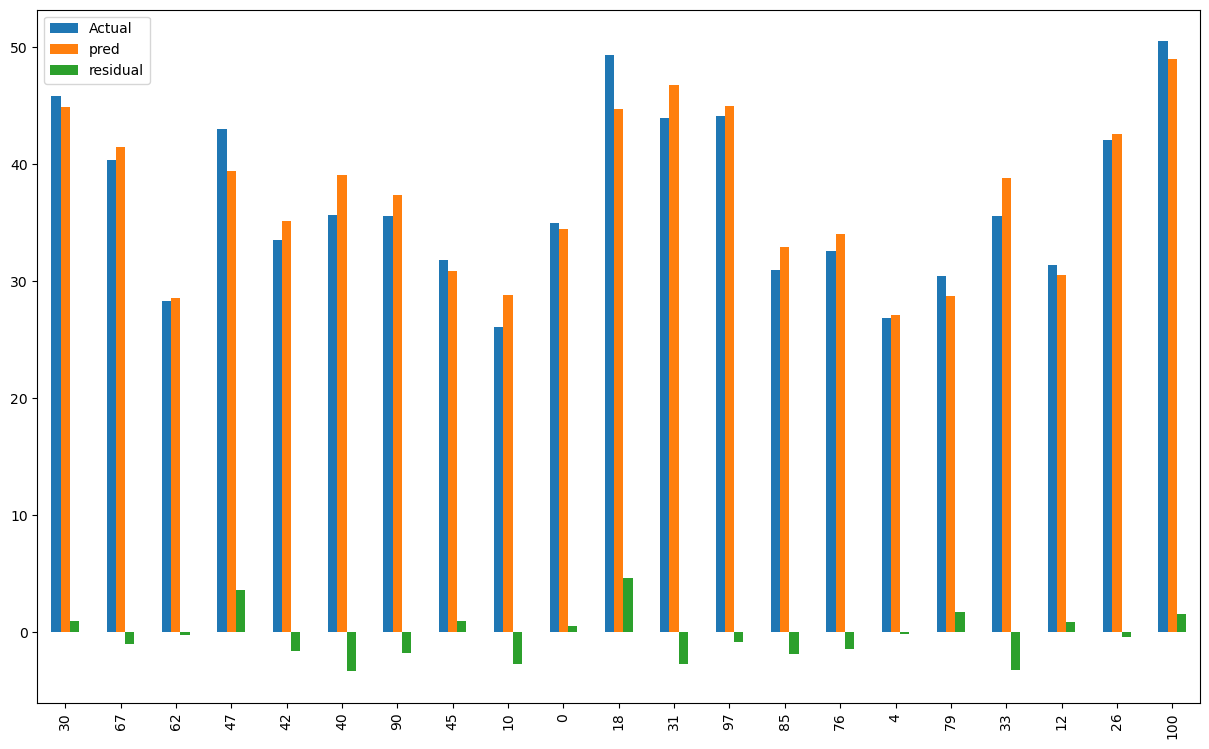

In [36]:
compare.plot(kind='bar',figsize=(15,9))
plt.show();

In [37]:
model_poly.coef_

array([ 0.05418994, -0.03649207,  0.04467527, -0.23337395,  0.04160126,
       -0.06008875, -0.04199926, -0.24320324,  0.082191  ])

In [38]:
df_coef = pd.DataFrame(model_poly.coef_, index = df.drop(columns="SLUMP(cm)").columns, columns = ["coef"])
df_coef

,coef
Cement,0.054
Slag,-0.036
Fly ash,0.045
Water,-0.233
SP,0.042
Coarse Aggr.,-0.060
Fine Aggr.,-0.042
FLOW(cm),-0.243
Compressive Strength (28-day)(Mpa),0.082


### 1.2 Model Evaluation
* Evaluate the model if it is appropriate to linear regression,to do so use residuals and R-squared.

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
y_pred = model_poly.predict(X_test)

# metriclerimizi alabilmek için test datası üzerinden predictionlarımızı alıyoruz.

In [41]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score : {R2_score}")
    print(f"MAE {'':<5}: {mae}")
    print(f"MSE {'':<5}: {mse}")
    print(f"RMSE{'':<5}: {rmse}")
    
# metricleri topluca birarada görebilmek için fonksiyonumuz tanımlıyoruz.

In [42]:
eval_metric(y_test, y_pred)

# test setinden aldığımız score bizim bu model için aldığımız nihai yani müşteriye sunulacak scoredur.

Model testing performance:
--------------------------
R2_score : 0.9119667722073416
MAE      : 1.7403833504751798
MSE      : 4.454236789564648
RMSE     : 2.110506287497066


In [43]:
y_train_pred = model_poly.predict(X_train)

In [44]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score : 0.9071449835138063
MAE      : 1.9362628449839188
MSE      : 5.8743125618572245
RMSE     : 2.423698116898477


In [45]:
def poly(d):
    
    train_rmse_errors = []
    test_rmse_errors = []
    number_of_features = []
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias = False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)
        
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, 
                         "number of features":number_of_features}, index=range(1,d))


# optimal degree'yi bulabilmek için her degree için train ve test scorlarını en çok tercih edilen rmse metrici üzerinden 
# karşılaştırıp seçimimizi yapacağız.


# 1 ile istediğimiz değer aralığındaki tüm degree değerlerinin train ve test seti rmse scorları ile her degree'ye ait gözlem 
# sayımızı gösteren yukarıdaki fonksiyonu tanımlıyoruz.


In [46]:
poly(5)

,train_rmse_errors,test_rmse_errors,number of features
1,2.424,2.111,9
2,0.251,0.791,54
3,0.000,1.085,219
4,0.000,1.283,714


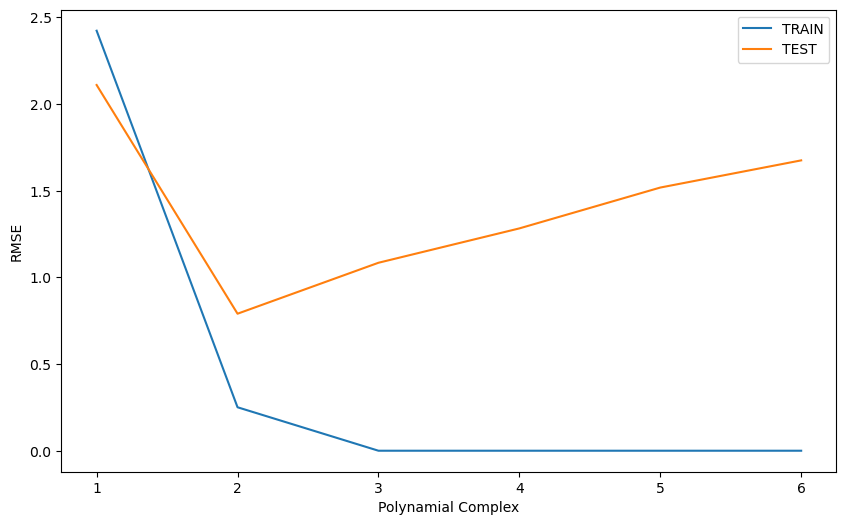

In [47]:
plt.plot(range(1,7), poly(7)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,7), poly(7)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();

# optimum degree seçilirken patlama noktasından kendimizi uzak tutmaya çalışıyoruz.
# patlama 4. degreede başladığı için 2 veya 3 tercih edilebilir.
# ancak ML'de herzaman hedefimiz az feature ile max scoru elde etmek olduğundan degree 2'yi tercih etmek daha mantıklıdır.

# 2. Regularization
* Regularize the model by adding a regularization term to the loss function.

## Cross Validate

In [49]:
from sklearn.model_selection import cross_validate, cross_val_score

In [53]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =5,
             return_train_score=True)

# daha önceki derslerimizde öğrendiğimiz gibi overfiting kontrolünü cross validaition üzerinden aldığımız. train ve 
# validation scorlarını karşılaştırarak yapıyoruz.

In [54]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.019,0.001,0.942,0.890,-1.909,-1.987,-4.645,-6.475,-2.155,-2.545
1,0.001,0.001,0.707,0.932,-2.647,-1.743,-10.757,-4.791,-3.280,-2.189
2,0.001,0.001,0.866,0.908,-1.483,-2.045,-3.726,-6.536,-1.930,-2.557
3,0.001,0.001,0.923,0.895,-2.244,-1.874,-8.434,-5.448,-2.904,-2.334
4,0.001,0.001,0.793,0.920,-2.868,-1.792,-11.698,-5.161,-3.420,-2.272


In [57]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                              0.846
train_r2                             0.909
test_neg_mean_absolute_error        -2.230
train_neg_mean_absolute_error       -1.888
test_neg_mean_squared_error         -7.852
train_neg_mean_squared_error        -5.682
test_neg_root_mean_squared_error    -2.738
train_neg_root_mean_squared_error   -2.379
dtype: float64

In [90]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.906,0.911
mae,1.938,1.732
mse,5.922,4.493
rmse,2.434,2.120


In [60]:
(2.111/df["Compressive Strength (28-day)(Mpa)"].mean())*100

5.857585823237672

In [62]:
lm.coef_

array([ 4.28015177, -2.22287954,  3.9320198 , -4.77083923,  0.12109966,
       -5.27729122, -2.61131342, -2.18837804,  1.46570621])

In [100]:
lm_df = pd.DataFrame(lm.coef_, columns=["lm_coef"])
lm_df

,lm_coef
0,4.280
1,-2.223
2,3.932
3,-4.771
4,0.121
5,-5.277
6,-2.611
7,-2.188
8,1.466


### Linear Regression with PipeLine 

In [68]:
from sklearn.pipeline import Pipeline # pipeline is used to combine scaler and model

In [69]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression() # will be used in pipeline later

In [70]:
pipe_lm = Pipeline([("scaler", scaler), ("lm", lm)]) # pipeline is used to combine scaler and model

#elle yaptığımız işlemler pipeline ile tek satırda uygulayacağımız işlemleri yazarak yapabiliyoruz.

In [71]:
pipe_lm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lm', LinearRegression())])

In [72]:
y_pred = pipe_lm.predict(X_test) # predict on test data
y_train_pred = pipe_lm.predict(X_train) # predict on train data

In [73]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear") # train and test scores


,linear_train,linear_test
R2,0.907,0.912
mae,1.936,1.740
mse,5.874,4.454
rmse,2.424,2.111


### Cross Validation with PipeLine

In [74]:
from sklearn.model_selection import cross_validate, cross_val_score

In [75]:
model = Pipeline([("scaler", scaler), ("lm", lm)])

scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)


In [78]:
scores = pd.DataFrame(scores)
scores

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.025,0.004,0.942,-1.909,-4.645,-2.155
1,0.003,0.002,0.707,-2.647,-10.757,-3.280
2,0.003,0.001,0.866,-1.483,-3.726,-1.930
3,0.002,0.001,0.923,-2.244,-8.434,-2.904
4,0.002,0.001,0.793,-2.868,-11.698,-3.420


In [79]:
scores.iloc[:, 2:].mean()

test_r2                             0.846
test_neg_mean_absolute_error       -2.230
test_neg_mean_squared_error        -7.852
test_neg_root_mean_squared_error   -2.738
dtype: float64

In [80]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.907,0.912
mae,1.936,1.740
mse,5.874,4.454
rmse,2.424,2.111


In [83]:
print("train RMSE:", 2.423698/df["Compressive Strength (28-day)(Mpa)"].mean())
print("CV RMSE:", 2.737927/df["Compressive Strength (28-day)(Mpa)"].mean())

train RMSE: 0.06725257718905493
CV RMSE: 0.07597177821060941


In [81]:
pipe_lm["lm"].coef_

array([ 4.28015177, -2.22287954,  3.9320198 , -4.77083923,  0.12109966,
       -5.27729122, -2.61131342, -2.18837804,  1.46570621])

In [82]:
pd.DataFrame(pipe_lm["lm"].coef_, columns= ["lm_coef"])

,lm_coef
0,4.280
1,-2.223
2,3.932
3,-4.771
4,0.121
5,-5.277
6,-2.611
7,-2.188
8,1.466


## 2.1 Ridge (Apply and evaluate)
* Build a Ridge regression model, fit the model, and make predictions on the test and train set, and compare them.


In [84]:
from sklearn.linear_model import Ridge

In [85]:
ridge_model = Ridge(alpha=1, random_state=42) # will be used in pipeline later

In [86]:
pipe_ridge = Pipeline([("scaler", scaler), ("ridge", ridge_model)]) # pipeline is used to combine scaler and model

In [87]:
pipe_ridge.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=1, random_state=42))])

In [88]:
y_pred = pipe_ridge.predict(X_test)
y_train_pred = pipe_ridge.predict(X_train)

In [89]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.906,0.911
mae,1.938,1.732
mse,5.922,4.493
rmse,2.434,2.120


In [91]:
pd.concat([ls, rs], axis=1)  # combine train and test scores to compare

,linear_train,linear_test,ridge_train,ridge_test
R2,0.906,0.911,0.906,0.911
mae,1.938,1.732,1.938,1.732
mse,5.922,4.493,5.922,4.493
rmse,2.434,2.120,2.434,2.120


## For Ridge Regression CV with alpha : 1 

In [92]:
model = Pipeline([("scaler", scaler), ("ridge", ridge_model)])

scores = cross_validate(model, X_train, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],cv=5)


In [93]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.016,0.002,0.945,-1.837,-4.420,-2.102
2,0.003,0.001,0.709,-2.651,-10.681,-3.268
3,0.002,0.001,0.871,-1.488,-3.597,-1.896
4,0.002,0.001,0.921,-2.256,-8.711,-2.951
5,0.002,0.001,0.805,-2.793,-11.033,-3.322


In [94]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             0.850
test_neg_mean_absolute_error       -2.205
test_neg_mean_squared_error        -7.688
test_neg_root_mean_squared_error   -2.708
dtype: float64

In [95]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.906,0.911
mae,1.938,1.732
mse,5.922,4.493
rmse,2.434,2.120


In [ ]:
pipe_ridge["ridge"].coef_

In [99]:
rm_df = pd.DataFrame(pipe_ridge["ridge"].coef_, columns = ["ridge_coef_1"])


In [103]:
pd.concat([lm_df, rm_df], axis = 1)

,lm_coef,ridge_coef_1
0,4.280,5.011
1,-2.223,-1.378
2,3.932,4.806
3,-4.771,-3.906
4,0.121,0.261
5,-5.277,-4.066
6,-2.611,-1.747
7,-2.188,-1.955
8,1.466,1.133


## Choosing best alpha value with Cross-Validation

In [105]:
from sklearn.linear_model import RidgeCV

In [106]:
alpha_space = np.linspace(0.1, 1, 100)
alpha_space

array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.38181818, 0.39090909, 0.4       , 0.40909091,
       0.41818182, 0.42727273, 0.43636364, 0.44545455, 0.45454545,
       0.46363636, 0.47272727, 0.48181818, 0.49090909, 0.5       ,
       0.50909091, 0.51818182, 0.52727273, 0.53636364, 0.54545455,
       0.55454545, 0.56363636, 0.57272727, 0.58181818, 0.59090909,
       0.6       , 0.60909091, 0.61818182, 0.62727273, 0.63636364,
       0.64545455, 0.65454545, 0.66363636, 0.67272727, 0.68181818,
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272

In [107]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 10, scoring= "neg_root_mean_squared_error") 
# will be used in pipeline later

In [108]:
pipe_ridgecv = Pipeline([("scaler", scaler), ("ridgecv", ridge_cv_model)]) 
# pipeline is used to combine scaler and model

In [109]:
pipe_ridgecv.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.336363...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         cv=10, scoring='neg_root_mean_squared_error'))])

In [110]:
pipe_ridgecv["ridgecv"].alpha_

0.9181818181818181

In [111]:
# Ridge( alpha = 0.91)
y_pred = pipe_ridgecv.predict(X_test)
y_train_pred = pipe_ridgecv.predict(X_train)  

In [112]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv") 
rcs

,ridge_cv_train,ridge_cv_test
R2,0.906,0.911
mae,1.938,1.732
mse,5.917,4.485
rmse,2.432,2.118


In [113]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.906,0.911,0.906,0.911,0.906,0.911
mae,1.938,1.732,1.938,1.732,1.938,1.732
mse,5.922,4.493,5.922,4.493,5.917,4.485
rmse,2.434,2.120,2.434,2.120,2.432,2.118


In [114]:
pipe_ridgecv["ridgecv"].coef_

array([ 5.00521265, -1.38945391,  4.79652108, -3.93170693,  0.25805802,
       -4.09232266, -1.76329842, -1.96996865,  1.15500214])

In [115]:
rcm_df = pd.DataFrame(pipe_ridgecv["ridgecv"].coef_, columns=["ridge_cv_coef_0.91"])

In [116]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1) 

,lm_coef,ridge_coef_1,ridge_cv_coef_0.91
0,4.280,5.011,5.005
1,-2.223,-1.378,-1.389
2,3.932,4.806,4.797
3,-4.771,-3.906,-3.932
4,0.121,0.261,0.258
5,-5.277,-4.066,-4.092
6,-2.611,-1.747,-1.763
7,-2.188,-1.955,-1.970
8,1.466,1.133,1.155


## 2.2 Lasso (Apply and evalute)
* Build a Lasso regression model, fit the model, and make predictions on the test and train set, and compare them.

In [117]:
from sklearn.linear_model import Lasso, LassoCV

In [118]:
lasso_model = Lasso(alpha=1, random_state=42)

In [119]:
pipe_lasso = Pipeline([("scaler", scaler), ("lasso", lasso_model)]) # pipeline is used to combine scaler and model

In [121]:
pipe_lasso.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=1, random_state=42))])

In [122]:
y_pred = pipe_lasso.predict(X_test)
y_train_pred = pipe_lasso.predict(X_train)

In [123]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso") 

lss

,lasso_train,lasso_test
R2,0.776,0.802
mae,2.960,2.466
mse,14.144,10.036
rmse,3.761,3.168


In [124]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.906,0.911,0.906,0.911,0.906,0.911,0.776,0.802
mae,1.938,1.732,1.938,1.732,1.938,1.732,2.960,2.466
mse,5.922,4.493,5.922,4.493,5.917,4.485,14.144,10.036
rmse,2.434,2.120,2.434,2.120,2.432,2.118,3.761,3.168


## For Lasso CV with Default Alpha : 1

In [125]:
model = Pipeline([("scaler", scaler), ("lasso", lasso_model)])

scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)


In [126]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.012,0.002,0.826,-3.154,-13.963,-3.737
2,0.003,0.001,0.500,-3.388,-18.345,-4.283
3,0.002,0.001,0.676,-2.382,-8.995,-2.999
4,0.002,0.001,0.682,-4.373,-34.946,-5.912
5,0.002,0.001,0.736,-3.244,-14.906,-3.861


In [127]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                              0.684
test_neg_mean_absolute_error        -3.308
test_neg_mean_squared_error        -18.231
test_neg_root_mean_squared_error    -4.158
dtype: float64

In [128]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.776,0.802
mae,2.960,2.466
mse,14.144,10.036
rmse,3.761,3.168


In [129]:
model["lasso"].coef_

array([ 4.82131411, -0.        ,  4.88005283, -0.81976891,  0.        ,
       -0.35149513, -0.        , -0.71063068, -0.        ])

In [130]:
lsm_df = pd.DataFrame(model["lasso"].coef_, columns = ["lasso_coef_1"])

In [131]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1) 

,lm_coef,ridge_coef_1,ridge_cv_coef_0.91,lasso_coef_1
0,4.280,5.011,5.005,4.821
1,-2.223,-1.378,-1.389,-0.000
2,3.932,4.806,4.797,4.880
3,-4.771,-3.906,-3.932,-0.820
4,0.121,0.261,0.258,0.000
5,-5.277,-4.066,-4.092,-0.351
6,-2.611,-1.747,-1.763,-0.000
7,-2.188,-1.955,-1.970,-0.711
8,1.466,1.133,1.155,-0.000


### Choosing best alpha value with Cross-Validation

In [132]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter=100000, random_state=42)
# will be used in pipeline later

In [133]:
pipe_lassocv = Pipeline([("scaler", scaler), ("lassocv", lasso_cv_model)]) 
# pipeline is used to combine scaler and model

In [134]:
pipe_lassocv.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lassocv',
                 LassoCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.336363...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         cv=10, max_iter=100000, random_state=42))])

In [135]:
pipe_lassocv["lassocv"].alpha_

0.1

In [136]:
# Lasso(alpha =0.1)
y_pred = pipe_lassocv.predict(X_test)   
y_train_pred = pipe_lassocv.predict(X_train)

In [137]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.900,0.908
mae,1.967,1.767
mse,6.295,4.658
rmse,2.509,2.158


In [138]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.906,0.911,0.906,0.911,0.906,0.911,0.776,0.802,0.900,0.908
mae,1.938,1.732,1.938,1.732,1.938,1.732,2.960,2.466,1.967,1.767
mse,5.922,4.493,5.922,4.493,5.917,4.485,14.144,10.036,6.295,4.658
rmse,2.434,2.120,2.434,2.120,2.432,2.118,3.761,3.168,2.509,2.158


In [139]:
pipe_lassocv["lassocv"].coef_

array([ 6.36058116,  0.        ,  6.44860782, -2.38557078,  0.46733827,
       -2.09003844, -0.22823288, -1.08177398,  0.        ])

In [140]:
lcm_df = pd.DataFrame(pipe_lassocv["lassocv"].coef_, columns = ["lasso_cv_coef_0.1"])

In [141]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1) # (7 fearures) test_r2 = 0.90

,lm_coef,ridge_coef_1,ridge_cv_coef_0.91,lasso_coef_1,lasso_cv_coef_0.1
0,4.280,5.011,5.005,4.821,6.361
1,-2.223,-1.378,-1.389,-0.000,0.000
2,3.932,4.806,4.797,4.880,6.449
3,-4.771,-3.906,-3.932,-0.820,-2.386
4,0.121,0.261,0.258,0.000,0.467
5,-5.277,-4.066,-4.092,-0.351,-2.090
6,-2.611,-1.747,-1.763,-0.000,-0.228
7,-2.188,-1.955,-1.970,-0.711,-1.082
8,1.466,1.133,1.155,-0.000,0.000


## 2.3 Elastic-Net (Apply and evaluate )

---

* Build an Elastic-Net regression model, fit the model, and make predictions on the test and train set, and compare them.
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [142]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [143]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42) 
# l1_ratio is used to control the amount of L1 and L2 regularization

In [144]:
pipe_elastic = Pipeline([("scaler", scaler), ("elastic", elastic_model)]) 
# pipeline is used to combine scaler and model

In [145]:

pipe_elastic.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('elastic', ElasticNet(alpha=1, random_state=42))])

In [146]:
y_pred = pipe_elastic.predict(X_test)
y_train_pred = pipe_elastic.predict(X_train)

In [147]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.637,0.635
mae,3.803,3.556
mse,22.982,18.466
rmse,4.794,4.297


In [148]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.906,0.911,0.906,0.911,0.906,0.911,0.776,0.802,0.900,0.908,0.637,0.635
mae,1.938,1.732,1.938,1.732,1.938,1.732,2.960,2.466,1.967,1.767,3.803,3.556
mse,5.922,4.493,5.922,4.493,5.917,4.485,14.144,10.036,6.295,4.658,22.982,18.466
rmse,2.434,2.120,2.434,2.120,2.432,2.118,3.761,3.168,2.509,2.158,4.794,4.297


## For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [150]:
model = Pipeline([("scaler", scaler), ("elastic", ElasticNet(alpha=1, l1_ratio=0.5, random_state=42))])

scores = cross_validate(model, X_train, y_train,
            scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)


In [151]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.559,-4.934,-35.413,-5.951
2,0.466,-3.312,-19.562,-4.423
3,0.537,-3.037,-12.860,-3.586
4,0.541,-5.518,-50.401,-7.099
5,0.625,-4.116,-21.178,-4.602


In [152]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              0.546
test_neg_mean_absolute_error        -4.183
test_neg_mean_squared_error        -27.883
test_neg_root_mean_squared_error    -5.132
dtype: float64

In [153]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.637,0.635
mae,3.803,3.556
mse,22.982,18.466
rmse,4.794,4.297


In [154]:
pipe_elastic["elastic"].coef_

array([ 2.61657059, -0.73015253,  2.67139945, -1.20195947,  0.        ,
       -1.16386814, -0.32234008, -0.82569551, -0.        ])

In [156]:
em_df = pd.DataFrame(pipe_elastic["elastic"].coef_, columns=["elastic_coef_(alp:1, L1:0.5)"])

In [157]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.91,lasso_coef_1,lasso_cv_coef_0.1,"elastic_coef_(alp:1, L1:0.5)"
0,4.280,5.011,5.005,4.821,6.361,2.617
1,-2.223,-1.378,-1.389,-0.000,0.000,-0.730
2,3.932,4.806,4.797,4.880,6.449,2.671
3,-4.771,-3.906,-3.932,-0.820,-2.386,-1.202
4,0.121,0.261,0.258,0.000,0.467,0.000
5,-5.277,-4.066,-4.092,-0.351,-2.090,-1.164
6,-2.611,-1.747,-1.763,-0.000,-0.228,-0.322
7,-2.188,-1.955,-1.970,-0.711,-1.082,-0.826
8,1.466,1.133,1.155,-0.000,0.000,-0.000


## Grid Search for ElasticNet

In [158]:
from sklearn.model_selection import GridSearchCV

In [159]:
elastic_model = ElasticNet(max_iter=10000, random_state=42) 

In [160]:
pipe_elastic = Pipeline([("scaler", scaler), ("elastic", elastic_model)]) 
# pipeline is used to combine scaler and model

In [161]:
param_grid = {"elastic__alpha":alpha_space,
              "elastic__l1_ratio":[0.1, 0.5, 0.7,0.9, 0.95, 1]}

In [162]:
grid_model = GridSearchCV(estimator = pipe_elastic, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [163]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elast

[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic_

[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545

[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.17272727272727273

[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__

[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727

[CV] END elastic__alpha=0.24545454545454545, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1

[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186

[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l

[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636

[CV] END elastic__alpha=0.3545454545454545, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.3545454545454545, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.3545454545454545, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic

[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1

[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1

[CV] END elastic__alpha=0.44545454545454544, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.44545454545454544, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.44545454545454544, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.44545454545454544, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.44545454545454544, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.44545454545454544, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.44545454545454544, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.44545454545454544, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.44545454545454544, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.44545454545454544, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.44545454545454544, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.44545454545454544

[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266

[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__

[CV] END elastic__alpha=0.5272727272727272, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5272727272727272, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5272727272727272, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5272727272727272, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5272727272727272, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5272727272727272, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5272727272727272, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5272727272727272, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5272727272727272, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5272727272727272, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5272727272727272, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5272727272727272, elastic__l

[CV] END elastic__alpha=0.5545454545454546, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5545454545454546, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5545454545454546, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5545454545454546, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5545454545454546, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5545454545454546, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5545454545454546, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5545454545454546, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5545454545454546, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5545454545454546, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5545454545454546, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5545454545454546, elastic__l

[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l

[CV] END ............elastic__alpha=0.6, elastic__l1_ratio=1; total time=   0.0s
[CV] END ............elastic__alpha=0.6, elastic__l1_ratio=1; total time=   0.0s
[CV] END ............elastic__alpha=0.6, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.1; total time=

[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.6363636363636364, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6363636363636364, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6363636363636364, elastic__l1_ratio=0.1; total

[CV] END elastic__alpha=0.6545454545454545, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.6545454545454545, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.6545454545454545, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_rati

[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l

[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l

[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l

[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l

[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l

[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l

[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l

[CV] END elastic__alpha=0.8818181818181817, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8818181818181817, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8818181818181817, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8818181818181817, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8818181818181817, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8818181818181817, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8818181818181817, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8818181818181817, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8818181818181817, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8818181818181817, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8818181818181817, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8818181818181817, elastic__l

[CV] END elastic__alpha=0.9090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9090909090909091, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9090909090909091, elastic__l

[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l

[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l

[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('elastic',
                                        ElasticNet(max_iter=10000,
                                                   random_state=42))]),
             param_grid={'elastic__alpha': array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545,...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         'elastic__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [164]:
grid_model.best_params_

{'elastic__alpha': 0.1, 'elastic__l1_ratio': 1}

In [165]:
y_pred = grid_model.predict(X_test)
y_train_pred = grid_model.predict(X_train)

In [166]:
gm = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_grid")
gm

,elastic_grid_train,elastic_grid_test
R2,0.900,0.908
mae,1.967,1.767
mse,6.295,4.658
rmse,2.509,2.158


In [167]:
pd.concat([ls,rs, rcs, lss, lcs, es, gm], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_grid_train,elastic_grid_test
R2,0.906,0.911,0.906,0.911,0.906,0.911,0.776,0.802,0.900,0.908,0.637,0.635,0.900,0.908
mae,1.938,1.732,1.938,1.732,1.938,1.732,2.960,2.466,1.967,1.767,3.803,3.556,1.967,1.767
mse,5.922,4.493,5.922,4.493,5.917,4.485,14.144,10.036,6.295,4.658,22.982,18.466,6.295,4.658
rmse,2.434,2.120,2.434,2.120,2.432,2.118,3.761,3.168,2.509,2.158,4.794,4.297,2.509,2.158


## Feature importances with Ridge

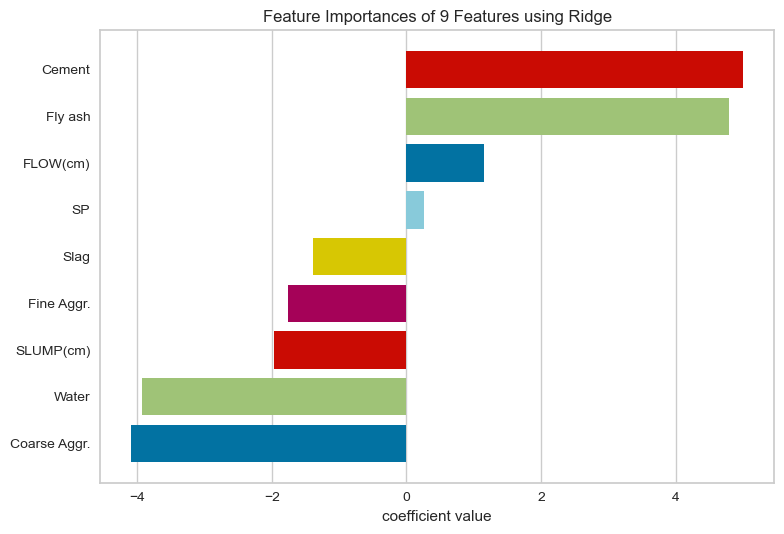

<AxesSubplot:title={'center':'Feature Importances of 9 Features using Ridge'}, xlabel='coefficient value'>

In [168]:
from yellowbrick.model_selection import FeatureImportances 

model = Ridge(alpha=pipe_ridgecv["ridgecv"].alpha_)  # ridge_cv_model.alpha_ = 0.91
viz = FeatureImportances(model,labels=list(X.columns),relative=False)
viz.fit(X_train_scaled,y_train)
viz.show();

## Feature importances with Lasso

In [169]:
pipe_lassocv["lassocv"].alpha_

0.1

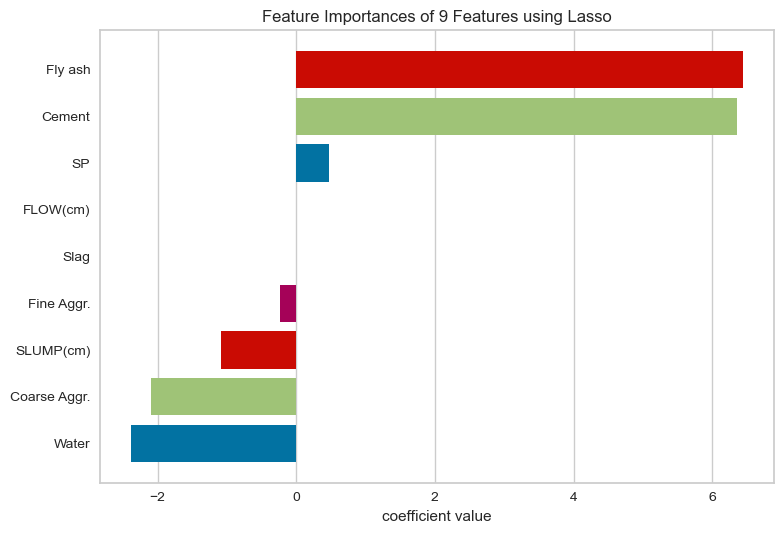

In [171]:
from yellowbrick.model_selection import FeatureImportances

model = Lasso(alpha=pipe_lassocv["lassocv"].alpha_)  # lasso_cv_model.alpha_ = 0.1
viz = FeatureImportances(model,labels=list(X.columns),relative=False)
viz.fit(X_train_scaled,y_train)
viz.show();